# **Import Lib**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import r2_score

In [31]:
from tensorflow.keras.optimizers import SGD

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# **Load the dataset**

In [33]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# **Split the data into training and test sets**

In [35]:
X = df.drop('target', axis=1)
y = df['target']

In [36]:
X.shape

(20640, 8)

In [37]:
y.shape

(20640,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape

(16512, 8)

In [40]:
X_test.shape

(4128, 8)

# **Scale the Features**

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

# **Build the neural network model**

In [43]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
X_train.shape[1]

8

# **Compile the model**

In [46]:
model.compile(optimizer = SGD(learning_rate = 0.01, momentum=0.5, nesterov=True), loss = 'mse', metrics=['mae'])

# **Train the model**

In [47]:
history = model.fit(X_train, y_train,validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
413/413 [==============================] - 2s 4ms/step - loss: 0.6141 - mae: 0.5455 - val_loss: 0.4772 - val_mae: 0.4879
Epoch 2/20
413/413 [==============================] - 2s 5ms/step - loss: 0.4133 - mae: 0.4550 - val_loss: 0.4119 - val_mae: 0.4453
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3735 - mae: 0.4326 - val_loss: 0.4427 - val_mae: 0.4509
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3565 - mae: 0.4209 - val_loss: 0.3747 - val_mae: 0.4333
Epoch 5/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3394 - mae: 0.4111 - val_loss: 0.3582 - val_mae: 0.4223
Epoch 6/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3341 - mae: 0.4043 - val_loss: 0.3525 - val_mae: 0.4217
Epoch 7/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3244 - mae: 0.3991 - val_loss: 0.4176 - val_mae: 0.4520
Epoch 8/20
413/413 [==============================] - 1s 3ms/step - loss: 0.

# **Evaluate the model on the test set**

In [48]:
y_pred = model.predict(X_test)

129/129 [==============================] - 0s 1ms/step


In [49]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7672972483106869


In [50]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

129/129 [==============================] - 0s 2ms/step - loss: 0.3049 - mae: 0.3698
Test Loss: 0.30493584275245667
Test MAE: 0.36984366178512573


# **Plot**

In [51]:
# Function to plot the training, validation, and test metrics
def plot_metrics(history, y_test, y_pred, test_loss, test_mae, metric_name):
    plt.plot(history.history[metric_name], label=f'Training {metric_name}')
    plt.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name}')
    if metric_name == 'loss':
        plt.scatter(len(history.history[metric_name]) - 1, test_loss, color='red', label='Test Loss')
    else:
        plt.scatter(len(history.history[metric_name]) - 1, test_mae, color='red', label='Test MAE')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.show()

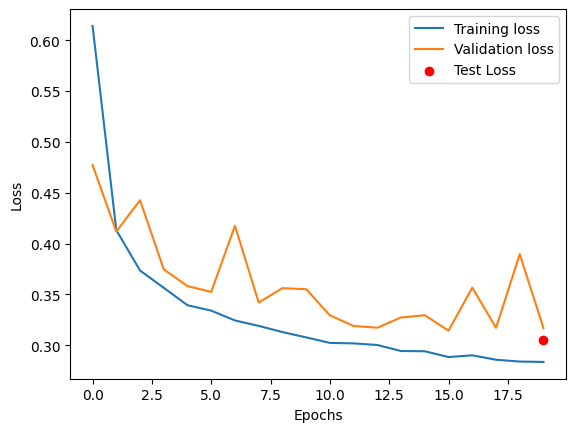

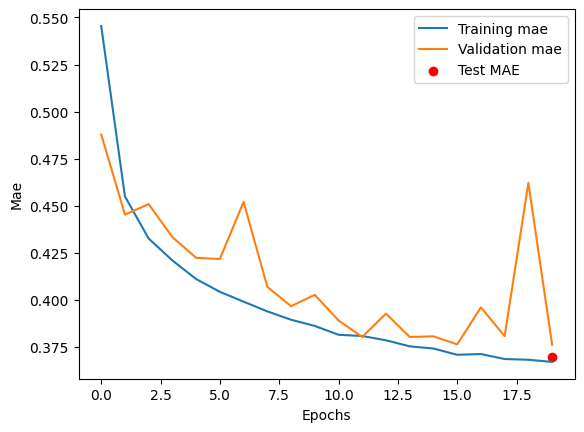

In [52]:
plot_metrics(history, y_test, y_pred, test_loss, test_mae, 'loss')
plot_metrics(history, y_test, y_pred, test_loss, test_mae, 'mae')